In [192]:
import pandas as pd
import numpy as np
import Haversine # haversine distance in km%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [47]:
Haversine.distance((40.8131105,-73.9642424),(40.8111595,-73.964498))

0.2180051585076213

In [37]:
df_subway = pd.read_csv('NYC_Transit_Subway_Entrance_And_Exit_Data.csv')

In [22]:
df_subway

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,...,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,False,NaN,False,4th Ave,25th St,SE,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
1,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,False,NaN,False,4th Ave,25th St,SW,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.998220)"
2,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NW,40.654490,-74.004499,"(40.655144, -74.003549)","(40.654490, -74.004499)"
3,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NE,40.654365,-74.004113,"(40.655144, -74.003549)","(40.654365, -74.004113)"
4,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NW,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"
5,BMT,4 Avenue,45th St,40.648939,-74.010006,R,NaN,NaN,NaN,NaN,...,False,NaN,True,4th Ave,45th St,NE,40.649389,-74.009333,"(40.648939, -74.010006)","(40.649389, -74.009333)"
6,BMT,4 Avenue,45th St,40.648939,-74.010006,R,NaN,NaN,NaN,NaN,...,False,NaN,True,4th Ave,45th St,NW,40.649424,-74.009728,"(40.648939, -74.010006)","(40.649424, -74.009728)"
7,BMT,4 Avenue,45th St,40.648939,-74.010006,R,NaN,NaN,NaN,NaN,...,False,NaN,True,4th Ave,45th St,NE,40.649265,-74.009457,"(40.648939, -74.010006)","(40.649265, -74.009457)"
8,BMT,4 Avenue,45th St,40.648939,-74.010006,R,NaN,NaN,NaN,NaN,...,False,NaN,True,4th Ave,45th St,NW,40.649546,-74.009602,"(40.648939, -74.010006)","(40.649546, -74.009602)"
9,BMT,4 Avenue,53rd St,40.645069,-74.014034,R,NaN,NaN,NaN,NaN,...,False,NaN,True,4th Ave,53rd St,SW,40.644653,-74.014690,"(40.645069, -74.014034)","(40.644653, -74.014690)"


In [ ]:
# calculate each home's proximity to subway entrance

In [23]:
df_visual = pd.read_csv('data for visual.csv')

In [52]:
len(df_visual.dropna())

4589

In [49]:
df_visual.

5504

In [25]:
lat_min = min(df_visual['latitude'])
lat_max = max(df_visual['latitude'])
log_min = min(df_visual['logitude'])
log_max = max(df_visual['logitude'])

In [26]:
print(lat_min)
print(lat_max)
print(log_min)
print(log_max)

40.704399
40.87243400000001
-74.018116
-73.89805799999998


In [27]:
df_subway = df_subway[(df_subway['Entrance Latitude']>= lat_min) &
                      (df_subway['Entrance Latitude']<= lat_max) &
                      (df_subway['Entrance Longitude']>= log_min) &
                      (df_subway['Entrance Longitude']<= log_max)
                     ]

In [55]:
len(df_subway['Station Name'].unique())

356

In [31]:
len(df_subway)

1011

In [62]:
df_subway.loc[0]['Entrance Latitude']

40.660322999999998

In [110]:
# Haversine distance calculation
#for h in range(len(df_visual)):
# break up into several 
for h in range(2000,len(df_visual)):
    dist_array = np.zeros(len(df_subway))
    for i in range(len(df_subway)):
        entrance_lat = df_subway.loc[i]['Entrance Latitude']
        entrance_log = df_subway.loc[i]['Entrance Longitude']
        home_lat = df_visual.loc[h]['latitude']
        home_log = df_visual.loc[h]['logitude']
        dist_array[i] = Haversine.distance((entrance_lat,entrance_log),(home_lat,home_log))
    df_visual.loc[h,'Station Name'] = df_subway.loc[np.argmin(dist_array)]['Station Name']
    df_visual.loc[h,'Route1'] = df_subway.loc[np.argmin(dist_array)]['Route1']
    df_visual.loc[h,'Route2'] = df_subway.loc[np.argmin(dist_array)]['Route2']
    df_visual.loc[h,'Route3'] = df_subway.loc[np.argmin(dist_array)]['Route3']
    df_visual.loc[h,'Route4'] = df_subway.loc[np.argmin(dist_array)]['Route4']
    df_visual.loc[h,'Route5'] = df_subway.loc[np.argmin(dist_array)]['Route5']
    df_visual.loc[h,'Route6'] = df_subway.loc[np.argmin(dist_array)]['Route6']
    df_visual.loc[h,'Route7'] = df_subway.loc[np.argmin(dist_array)]['Route7']
    df_visual.loc[h,'Route8'] = df_subway.loc[np.argmin(dist_array)]['Route8']
    df_visual.loc[h,'Route9'] = df_subway.loc[np.argmin(dist_array)]['Route9']
    df_visual.loc[h,'Route10'] = df_subway.loc[np.argmin(dist_array)]['Route10']
    df_visual.loc[h,'Route11'] = df_subway.loc[np.argmin(dist_array)]['Route11']
    df_visual.loc[h,'distance to subway'] = min(dist_array)
    # about 5 seconds for each home

In [112]:
df_visual.loc[1000:len(df_visual)]

,Neighborhood,bath,bed,latitude,logitude,price,size,year built,zipcode,Station Name,...,Route3,Route4,Route5,Route6,Route7,Route8,Route9,Route10,Route11,distance to subway
1000,Gramercy Park and Murray Hill,1.0,1.0,40.738560,-73.980063,495000.0,550.0,1964.0,10010.0,23rd St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.532120
1001,Gramercy Park and Murray Hill,4.0,3.0,40.740510,-73.988104,10878000.0,2723.0,2009.0,10010.0,23rd St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.094929
1002,Gramercy Park and Murray Hill,2.0,3.0,40.739870,-73.982761,1999000.0,1750.0,1964.0,10010.0,23rd St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.275556
1003,Gramercy Park and Murray Hill,1.0,1.0,40.737900,-73.985500,1095000.0,NaN,1930.0,10010.0,23rd St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.196863
1004,Gramercy Park and Murray Hill,1.0,1.0,40.737956,-73.982748,749000.0,321079.0,1931.0,10010.0,23rd St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.363127
1005,Gramercy Park and Murray Hill,4.0,3.0,40.743475,-73.988684,11600000.0,3008.0,1912.0,10010.0,28th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.180355
1006,Gramercy Park and Murray Hill,4.0,4.0,40.742698,-73.989601,16000000.0,3309.0,1915.0,10010.0,23rd St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.088496
1007,Gramercy Park and Murray Hill,1.0,1.0,40.739339,-73.981704,650000.0,650.0,1976.0,10010.0,23rd St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.374315
1008,Gramercy Park and Murray Hill,1.0,1.0,40.740797,-73.982184,629000.0,750.0,1925.0,10010.0,28th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.293011
1009,Gramercy Park and Murray Hill,2.0,3.0,40.737201,-73.980796,1499000.0,1500.0,1965.0,10010.0,23rd St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.547767


In [115]:
df_visual.to_csv('data_with_subway_distance.csv')

In [69]:
df_subway.loc[np.argmin(dist_array)]

Division                                     IND
Line                                    8 Avenue
Station Name          Cathedral Parkway-110th St
Station Latitude                         40.8006
Station Longitude                       -73.9582
Route1                                         B
Route2                                         C
Route3                                       NaN
Route4                                       NaN
Route5                                       NaN
Route6                                       NaN
Route7                                       NaN
Route8                                       NaN
Route9                                       NaN
Route10                                      NaN
Route11                                      NaN
Entrance Type                              Stair
Entry                                        YES
Exit Only                                    NaN
Vending                                      YES
Staffing            

In [78]:
df_visual['Station Name'] = df_subway.loc[np.argmin(dist_array)]['Station Name']
df_visual['Route1'] = df_subway.loc[np.argmin(dist_array)]['Route1']
df_visual['Route2'] = df_subway.loc[np.argmin(dist_array)]['Route2']
df_visual['Route3'] = df_subway.loc[np.argmin(dist_array)]['Route3']
df_visual['Route4'] = df_subway.loc[np.argmin(dist_array)]['Route4']
df_visual['Route5'] = df_subway.loc[np.argmin(dist_array)]['Route5']
df_visual['Route6'] = df_subway.loc[np.argmin(dist_array)]['Route6']
df_visual['Route7'] = df_subway.loc[np.argmin(dist_array)]['Route7']
df_visual['Route8'] = df_subway.loc[np.argmin(dist_array)]['Route8']
df_visual['Route9'] = df_subway.loc[np.argmin(dist_array)]['Route9']
df_visual['Route10'] = df_subway.loc[np.argmin(dist_array)]['Route10']
df_visual['Route11'] = df_subway.loc[np.argmin(dist_array)]['Route11']
df_visual['distance to subway'] = min(dist_array)

In [84]:
df_visual.loc[0,'distance to subway'] = min(dist_array)

In [85]:
df_visual.loc[0,'Station Name'] = df_subway.loc[np.argmin(dist_array)]['Station Name']
df_visual.loc[0,'Route1'] = df_subway.loc[np.argmin(dist_array)]['Route1']
df_visual.loc[0,'Route2'] = df_subway.loc[np.argmin(dist_array)]['Route2']
df_visual.loc[0,'Route3'] = df_subway.loc[np.argmin(dist_array)]['Route3']
df_visual.loc[0,'Route4'] = df_subway.loc[np.argmin(dist_array)]['Route4']
df_visual.loc[0,'Route5'] = df_subway.loc[np.argmin(dist_array)]['Route5']
df_visual.loc[0,'Route6'] = df_subway.loc[np.argmin(dist_array)]['Route6']
df_visual.loc[0,'Route7'] = df_subway.loc[np.argmin(dist_array)]['Route7']
df_visual.loc[0,'Route8'] = df_subway.loc[np.argmin(dist_array)]['Route8']
df_visual.loc[0,'Route9'] = df_subway.loc[np.argmin(dist_array)]['Route9']
df_visual.loc[0,'Route10'] = df_subway.loc[np.argmin(dist_array)]['Route10']
df_visual.loc[0,'Route11'] = df_subway.loc[np.argmin(dist_array)]['Route11']
df_visual.loc[0,'distance to subway'] = min(dist_array)


In [74]:
df_visual.loc[0]

Neighborhood    Central Harlem
bath                         1
bed                          3
latitude               40.8014
logitude              -73.9549
price                   375000
size                       NaN
year built                1920
zipcode                  10026
Name: 0, dtype: object

In [172]:
df.head()

,Neighborhood,bath,bed,latitude,logitude,price,size,year built,zipcode,Station Name,...,Route4,Route5,Route6,Route7,Route8,Route9,Route10,Route11,distance to subway,number of subway lines
0,Central Harlem,1.0,3.0,40.801399,-73.954902,375000.0,NaN,1920,10026.0,Cathedral Parkway-110th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300754,2
1,Central Harlem,1.0,1.0,40.805369,-73.951677,279000.0,NaN,1900,10026.0,116th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300514,2
2,Central Harlem,1.0,3.0,40.804500,-73.958000,350000.0,NaN,1910,10026.0,116th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.199483,2
3,Central Harlem,4.0,6.0,40.805301,-73.957099,1350000.0,3264.0,1901,10026.0,116th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.149062,2
4,Central Harlem,4.0,5.0,40.802393,-73.957916,3995000.0,3333.0,1900,10026.0,Cathedral Parkway-110th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.174712,2


In [176]:
df[ ['bath', 'bed','logitude','latitude','price','size','distance to subway']].corr()

,bath,bed,logitude,latitude,price,size,distance to subway
bath,1.000000,0.812848,-0.017496,0.021948,0.660324,-0.056486,-0.004853
bed,0.812848,1.000000,0.123556,0.114223,0.479521,-0.068533,0.038302
logitude,-0.017496,0.123556,1.000000,0.720848,-0.134562,0.097407,0.269493
latitude,0.021948,0.114223,0.720848,1.000000,-0.060968,0.063548,0.093651
price,0.660324,0.479521,-0.134562,-0.060968,1.000000,-0.057504,-0.063867
size,-0.056486,-0.068533,0.097407,0.063548,-0.057504,1.000000,0.082194
distance to subway,-0.004853,0.038302,0.269493,0.093651,-0.063867,0.082194,1.000000


In [147]:
df =  pd.read_csv('data_with_subway_distance.csv')

In [151]:
df = df.drop(columns = 'Unnamed: 0')

In [153]:
for i in range(0,len(df)):
    df.loc[i,'number of subway lines'] = len(df.loc[i,'Route1':'Route11'].dropna())

In [154]:
 df['number of subway lines'] = df['number of subway lines'].apply(int)

In [158]:
max(df['number of subway lines'])

11

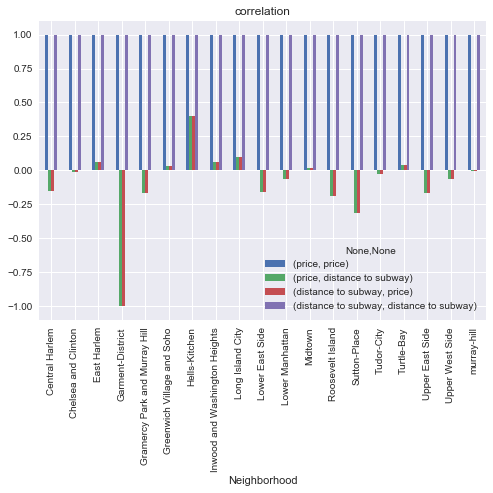

In [194]:
groupby = df.groupby('Neighborhood')
groupby[ ['price','distance to subway']].corr().to_csv('correlation.csv')
groupby[ ['price','distance to subway']].corr()[''].unstack().plot(kind='bar',title='correlation')

In [186]:
groupby_zipcode = df.groupby('zipcode')
groupby_zipcode[['price','distance to subway']].corr().to_csv('correlation_zipcode.csv')

In [190]:
groupby_zipcode_neiborhood = df.groupby(['Neighborhood','zipcode'])
groupby_zipcode_neiborhood[['price','distance to subway']].corr()

price  distance to subway
Neighborhood        zipcode                                                 
Central Harlem      10026.0 price               1.000000           -0.318482
                            distance to subway -0.318482            1.000000
                    10027.0 price               1.000000            0.177097
                            distance to subway  0.177097            1.000000
                    10030.0 price               1.000000           -0.116189
                            distance to subway -0.116189            1.000000
                    10037.0 price               1.000000            0.144869
                            distance to subway  0.144869            1.000000
                    10039.0 price               1.000000           -0.307248
                            distance to subway -0.307248            1.000000
Chelsea and Clinton 10001.0 price               1.000000            0.441497
                            distance to subway  0.441497            1.000000
                    10011.0 price               1.000000            0.167343
                            distance to subway  0.167343            1.000000
                    10017.0 price                    NaN                 NaN
                            distance to subway       NaN                 NaN
                    10018.0 price               1.000000            0.129655
                            distance to subway  0.129655            1.000000
                    10019.0 price               1.000000           -0.146193
                            distance to subway -0.146193            1.000000
                    10021.0 price               1.000000            0.132400
                            distance to subway  0.132400            1.000000
                    10022.0 price               1.000000           -0.609067
                            distance to subway -0.609067            1.000000
                    10023.0 price               1.000000           -0.383847
                            distance to subway -0.383847            1.000000
                    10036.0 price               1.000000            0.184375
                            distance to subway  0.184375            1.000000
                    10065.0 price               1.000000           -0.035115
                            distance to subway -0.035115            1.000000
...                                                  ...                 ...
Tudor-City          10017.0 price               1.000000           -0.766893
                            distance to subway -0.766893            1.000000
Turtle-Bay          10017.0 price               1.000000            0.066717
                            distance to subway  0.066717            1.000000
                    10019.0 price               1.000000            0.990708
                            distance to subway  0.990708            1.000000
                    10022.0 price               1.000000            0.054872
                            distance to subway  0.054872            1.000000
                    10036.0 price                    NaN                 NaN
                            distance to subway       NaN                 NaN
Upper East Side     10021.0 price               1.000000           -0.218803
                            distance to subway -0.218803            1.000000
                    10028.0 price               1.000000           -0.077257
                            distance to subway -0.077257            1.000000
                    10065.0 price               1.000000           -0.175070
                            distance to subway -0.175070            1.000000
                    10075.0 price               1.000000           -0.235688
                            distance to subway -0.235688            1.000000
                    10128.0 price               1.000000           -0.089731
                            distance to subway 